<a href="https://colab.research.google.com/github/klepy/DL/blob/master/CIFAR10_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


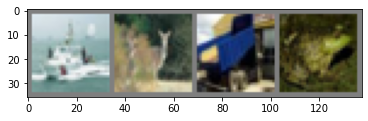

 ship  deer truck  frog


In [4]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  img = img /2 +0.5   # unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))
  plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]]for j in range(4)))

In [9]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

# 3.손실 함수와 Optimizer 정의하기
교차 엔트로피 손실(Cross-Entropy loss)과 모멘텀(momentum) 값을 갖는 SGD를 사용합니다.

In [10]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# 4. 신경망 학습하기


In [15]:
for epoch in range(50):

  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    # [inputs, labels]의 목록인 data로부터 입력을 받은 후
    inputs, labels = data

    # 변화도(Gradient) 매개변수를 0으로 만들고
    optimizer.zero_grad()

    # 순전파 + 역전파 + 최적화를 한 후
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # 통계 출력
    running_loss += loss.item()
    if i % 2000 == 1999: #print every 2000 mini-batches
      print('[%d, %5d] loss: %.3f' % 
            (epoch + 1, i + 1, running_loss /2000))
      running_loss = 0.0


[1,  2000] loss: 1.241
[1,  4000] loss: 1.228
[1,  6000] loss: 1.244
[1,  8000] loss: 1.230
[1, 10000] loss: 1.226
[1, 12000] loss: 1.205
[2,  2000] loss: 1.124
[2,  4000] loss: 1.145
[2,  6000] loss: 1.157
[2,  8000] loss: 1.144
[2, 10000] loss: 1.139
[2, 12000] loss: 1.145
[3,  2000] loss: 1.066
[3,  4000] loss: 1.080
[3,  6000] loss: 1.062
[3,  8000] loss: 1.073
[3, 10000] loss: 1.087
[3, 12000] loss: 1.062
[4,  2000] loss: 0.995
[4,  4000] loss: 0.996
[4,  6000] loss: 1.017
[4,  8000] loss: 1.015
[4, 10000] loss: 1.024
[4, 12000] loss: 1.032
[5,  2000] loss: 0.939
[5,  4000] loss: 0.959
[5,  6000] loss: 0.954
[5,  8000] loss: 0.981
[5, 10000] loss: 0.952
[5, 12000] loss: 0.977
[6,  2000] loss: 0.874
[6,  4000] loss: 0.900
[6,  6000] loss: 0.922
[6,  8000] loss: 0.927
[6, 10000] loss: 0.952
[6, 12000] loss: 0.944
[7,  2000] loss: 0.820
[7,  4000] loss: 0.868
[7,  6000] loss: 0.886
[7,  8000] loss: 0.899
[7, 10000] loss: 0.913
[7, 12000] loss: 0.920
[8,  2000] loss: 0.789
[8,  4000] 

KeyboardInterrupt: ignored

In [12]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(),PATH)

# 5. 시험용 데이터로 신경망 검사하기

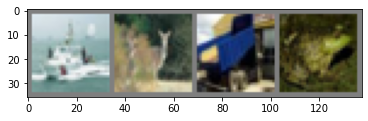

Ground Truth:    cat  ship  ship plane


In [14]:
dataiter = iter(testloader)
image, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('Ground Truth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [18]:
net = Net()
net.load_state_dict(torch.load(PATH))

outputs = net(images)

_, predicted = torch.max(outputs,1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range (4)))

Predicted:   ship  bird truck  frog


In [19]:
correct = 0
total = 0
with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuract of the network on the 10000 test images: %d %%' %(
    100 * correct/total))

Accuract of the network on the 10000 test images: 54 %


In [21]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
      label = labels[i]
      class_correct[label] += c[i].item()
      class_total[label] += 1

for i in range(10):
  print('Accuracy of %5s : %2d %%' % (
      classes[i], 100* class_correct[i] / class_total[i]))

Accuracy of plane : 55 %
Accuracy of   car : 62 %
Accuracy of  bird : 42 %
Accuracy of   cat : 36 %
Accuracy of  deer : 41 %
Accuracy of   dog : 52 %
Accuracy of  frog : 64 %
Accuracy of horse : 55 %
Accuracy of  ship : 76 %
Accuracy of truck : 60 %


# GPU에서 학습하기

In [22]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cuda:0


In [23]:
net.to(device)
inputs, labels = data[0].to(device), data[1].to(device)